In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb

In [2]:
file_input = "AI DATA export.csv"

In [3]:
df = pd.read_csv(file_input)

In [4]:
data = df

In [5]:
data.dropna(subset=['Resolution'], inplace=True)
data['Resolution'].fillna('Unknown', inplace=True)


In [6]:
# Specify columns to drop from features (X)
columns_to_drop = ['Resolution', 'Formatted ID', 'Name', 'State', 'ServiceNow_Problem']


In [7]:
# Separate features (X) and target variable (y)
X = data.drop(columns_to_drop, axis=1)
y = data['Resolution'] # Target Variable

# Initialize LabelEncoder for target variable
label_encoder = LabelEncoder()

# Encode target variable (y) into numeric labels
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features in X
X_encoded = pd.get_dummies(X) # This will one-hot encode all categorical columns

# perform the train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
# Set test_size to 0.2 to allocate 20% of the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

class SimpleClassifier:
    def __init__(self, n_estimators=100, max_depth=5, learning_rate=0.1, early_stopping_rounds=10):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.early_stopping_rounds = early_stopping_rounds
        self.scaler = StandardScaler()
        self.model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, early_stopping_rounds=early_stopping_rounds)

    def fit(self, X_train, y_train, validation_split=0.2, random_state=None):
        # Scale input features for training and validation
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        
        # Fit the XGBoost classifier
        self.model.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)], verbose=False)

    def predict(self, X):
        # Scale input features
        X_scaled = self.scaler.transform(X)
        
        # Make predictions using the XGBoost classifier
        return self.model.predict(X_scaled)

# Example usage:

# Assuming X_train, X_test, y_train, and y_test are defined
# Instantiate the custom XGBoost classifier
model = SimpleClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, early_stopping_rounds=10)

# Train the model
model.fit(X_train, y_train, validation_split=0.2, random_state=42)



In [9]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Print label names
classes = model.model.classes_
label_names = label_encoder.classes_

# Create a matrix to display class list and class names
class_matrix = []

# Add header row
header_row = ['Class Index', 'Class Name']
class_matrix.append(header_row)

# Add class index and class name for each class label
for idx, label in enumerate(classes):
    class_matrix.append([label, label_names[idx]])

# Display class list and class names in matrix form
for row in class_matrix:
    print("{:<12} {:<12}".format(*row))

# Evaluate accuracy for test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')


# Display classification report for test data
print("Classification Report for Test Data:")
report = classification_report(y_test, y_pred)
print(report)

# Make predictions on validation data
y_val_pred = model.predict(X_val)

# Evaluate accuracy for validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Display classification report for validation data
print("Classification Report for Validation Data:")
reportv = classification_report(y_val, y_val_pred)
print(reportv)

Class Index  Class Name  
0            Converted   
1            Database Change
2            Design/Code Change
3            Duplicate   
4            Not a Defect
5            Rejected    
6            Requirements Changed
Test Accuracy: 0.75
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       1.00      1.00      1.00         1
           2       0.80      0.89      0.84        62
           3       1.00      0.17      0.29        18
           4       0.67      0.87      0.75        46
           6       1.00      1.00      1.00         1

    accuracy                           0.75       144
   macro avg       0.88      0.74      0.75       144
weighted avg       0.78      0.75      0.72       144

Validation Accuracy: 0.72
Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        

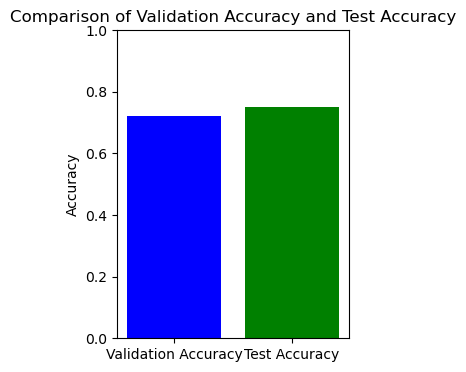

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = ['Validation Accuracy', 'Test Accuracy']
accuracy_values = [val_accuracy, test_accuracy]

# Plotting
plt.figure(figsize=(3, 4))
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Validation Accuracy and Test Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the full range of accuracy values is visible

plt.show()